# Regresión logística

## Introducción

La regresión logística es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.

Se llama regresión logística simple cuando solo hay una variable independiente y regresión logística múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores o features.


**Modelos de regresión logística en Python**

Dos de las implementaciones de modelos de regresión logística más utilizadas en Python son: scikit-learn y statsmodels. Aunque ambas están muy optimizadas, Scikit-learn está orientada principalmente a la predicción, por lo que no dispone de apenas funcionalidades que muestren las muchas características del modelo que se deben analizar para hacer inferencia. Statsmodels es más completa en este sentido.

## Definición matemática

El modelo de regresión lineal (Legendre, Gauss, Galton y Pearson) considera que, dado un conjunto de observaciones  $\{y_i,x_{i1},...,x_{np}\}^n_{i=1}$, la media $μ$ de la variable respuesta $y$
se relaciona de forma lineal con la o las variables regresoras $x1 ...  xp$ acorde a la ecuación:

$μ_y=β_0+β_1x_1+β_2x_2+...+β_px_p$
 
El resultado de esta ecuación se conoce como la línea de regresión poblacional, y recoge la relación entre los predictores y la media de la variable respuesta.

Otra definición que se encuentra con frecuencia en los libros de estadística es:

$y_i=β_0+β_1x_{i1}+β_2x_{i2}+...+β_px_{ip}+ϵi$
 
En este caso, se está haciendo referencia al valor de $y$ para una observación $i$ concreta. El valor de una observación puntual nunca va a ser exactamente igual al promedio, de ahí que se añada el término de error $ϵ$.

En ambos casos, la interpretación de los elementos del modelo es la misma:

- $β_0$ : es la ordenada en el origen, se corresponde con el valor promedio de la variable respuesta  $y$ cuando todos los predictores son cero.

- $β_p$: es el efecto promedio que tiene sobre la variable respuesta el incremento en una unidad de la variable predictora $x_p$, manteniéndose constantes el resto de variables. Se conocen como coeficientes parciales de regresión.

$e$: es el residuo o error, la diferencia entre el valor observado y el estimado por el modelo. Recoge el efecto de todas aquellas variables que influyen en $y$ pero que no se incluyen en el modelo como predictores.

En la gran mayoría de casos, los valores  $β_0$ y $β_p$ poblacionales se desconocen, por lo que, a partir de una muestra, se obtienen sus estimaciones $\hat{β}_0$ y $\hat{β}_p$. Ajustar el modelo consiste en estimar, a  partir de los datos disponibles, los valores de los coeficientes de regresión que maximizan la verosimilitud (likelihood), es decir, los que dan lugar al modelo que con mayor probabilidad puede haber generado los datos observados.

El método empleado con más frecuencia es el ajuste por mínimos cuadrados ordinarios (OLS), que identifica como mejor modelo la recta (o plano si es regresión múltiple) que minimiza la suma de las desviaciones verticales entre cada dato de entrenamiento y la recta, elevadas al cuadrado.

El término "lineal" en los modelos de regresión hace referencia al hecho de que los parámetros se incorporan en la ecuación de forma lineal, no a que necesariamente la relación entre cada predictor y la variable respuesta tenga que seguir un patrón de recta.

**¿Qué ocurre cuando la variable respuesta es binaria, solo dos posibles valores?**

Si una variable cualitativa con dos niveles (binaría) se codifica como 0 y 1, matemáticamente es posible ajustar un modelo de regresión lineal por mínimos cuadrados. Sin embargo, esta aproximación tiene dos problemas:

- Al generar una recta (hiperplano si hay múltiples variables), se pueden obtener valores predichos distintos de 0 y 1, lo que entra en contradicción con la definición de la variable respuesta binaria.

- Si se quiere interpretar las predicciones del modelo como probabilidades de pertenencia a cada clase, no se cumpliría la condición de que toda probabilidad ha de estar dentro del intervalo [0,1], ya que podrían obtenerse valores fuera de este.

Para evitar estos problemas, la regresión logística (David Cox 1958) transforma el valor devuelto por la regresión lineal con una función cuyo resultado siempre está comprendido entre 0 y 1. Existen varias funciones que cumplen esta descripción, una de las más utilizadas es la función logística (también conocida como función sigmoide):

$$sigmoide=σ(y)=\frac{1}{1+e^{−y}}$$

Para valores de $y$ positivos muy grandes, $e^{−y}$ es aproximadamente 0, por lo que el valor de la función sigmoide es 1. Para valores de $y$ negativos muy grandes, $e^{−y}$ tiende a infinito, por lo que el valor de la función sigmoide es 0.

Sustituyendo la $y$ de la ecuación anterior por la función de un modelo lineal $y=β_0+β_1x_1+...+β_px_p$ se obtiene que:

$$P(y=1|X=x)=\frac{e^{β_0+β_1x_1+...+β_px_p}}{1 + e^{β_0+β_1x_1+...+β_px_p}}$$
donde  $P(y=1|X=x)$ puede interpretarse como la probabilidad de que la variable respuesta $y$  adquiera el valor 1 (clase de referencia), dado los predictores $x1,...,xp$.

El modelo resultante tiene los coeficientes de regresión en los exponentes, por lo que no es un modelo lineal y no puede ajustarse con la estrategia descrita al inicio del documento. ¿Cómo evitar este inconveniente?

La expresión obtenida tiene la característica de ser siempre positiva, ya que la función exponencial solo toma valores positivos y, el cociente de valores positivos, es siempre positivo. Esto hace posible aplicarle el logaritmo:

$$ln(\frac{p(y=1|X=x)}{p(y=0|X=x)})=β_0+β_1x_1+...+β_px_p$$

Al realizar la transformación, en el lado derecho se obtiene la ecuación de un modelo lineal. El término de la izquierda resulta ser el logaritmo de un cociente de probabilidades, lo que se conoce como razón de probabilidad (log of odds).

Como resultado de este proceso se consigue convertir un problema de clasificación no lineal, en un problema de regresión lineal que sí puede ajustarse mediante los métodos convencionales.

Una vez obtenidos los coeficientes del modelo $(β_0,β_1,⋯,β_p)$ se puede obtener la probabilidad de que una nueva observación pertenezca a la clase $y=1$ con la ecuación:

$$p(y=1|X=x) = \frac{e^{β_0+β_1x_1+⋯+β_px_p}}{1+e^{β_0+β_1x_1+⋯+β_px_p)}}$$

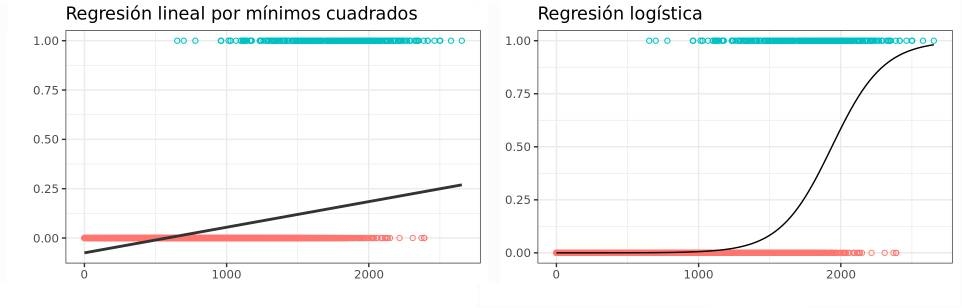

En el apartado anterior, se han obviado dos demostraciones importantes con el objetivo de facilitar la narrativa. Sin embargo, es importante tenerlas en cuenta para entender bien el funcionamiento de este tipo de modelos.

Combinación de la función sigmoide y la ecuación de un modelo lineal para obtener un modelo que relacione los predictores con la probabilidad de que  $y=1$.

$$sigmoide=σ(y)=\frac{1}{1+e^{−y}}$$

In [1]:
import math
import matplotlib.pyplot as plt
# implementa la función sigmoid
def sigmoid(y):
    s = 1/(1+math.exp(-y))
    return s

In [2]:
# Calcula la sigmoide para -100, -1, -0.5, 0, 0.5, 1, 100
for i in [-100, -1, -0.5, 0, 0.5, 1, 100]:
    print(f"La sigmoide de {i} es {sigmoid(i)}")

La sigmoide de -100 es 3.7200759760208356e-44
La sigmoide de -1 es 0.2689414213699951
La sigmoide de -0.5 es 0.3775406687981454
La sigmoide de 0 es 0.5
La sigmoide de 0.5 es 0.6224593312018546
La sigmoide de 1 es 0.7310585786300049
La sigmoide de 100 es 1.0


In [3]:
# calcula la sigmoide para todos los enteros entre -100 y 100
sigmoides = []
for s in range(-100, 101):
    sigmoides.append(sigmoid(s))

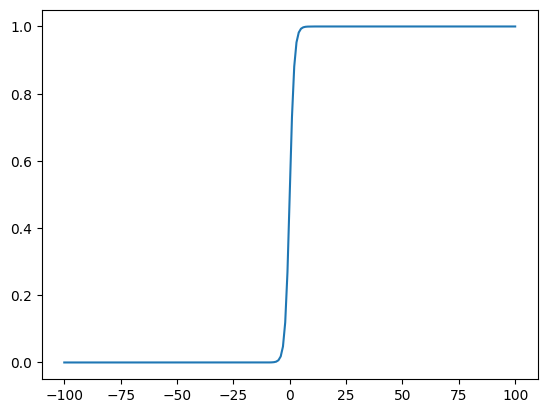

In [4]:
# Dibuja la sigmoide anterior
plt.plot( range(-100, 101), sigmoides)

## Odds y logaritmo de odds

Debido a las transformaciones necesarias, la regresión logística modela la probabilidad de que la variable respuesta pertenezca al grupo de referencia de forma indirecta mediante el uso del logaritmo de odds. Aunque la mayoría de implementaciones convierten el logaritmo de odds a probabilidades al mostrar las predicciones, conviene conocer su significado.

Supóngase un evento cuya probabilidad de ser verdadero es de 0.8 ($p=0.8$). Dado que es una variable binaria, la probabilidad ser falso es de  $1−0.8=0.2, (q=0.2)$. Los odds o razón de probabilidad se definen como el ratio entre la probabilidad de evento verdadero y la probabilidad de evento falso $\frac{p}{q}$. En este caso los odds son $0.8 / 0.2 = 4$, lo que equivale a decir que se esperan 4 eventos verdaderos por cada evento falso.

Dado que las probabilidades están acotadas siempre al rango [0,1], los odds están acotados entre [0, ∞]. Al aplicarles el logaritmo, el rango de valores pasa a ser de [- ∞, + ∞].

## Interpretación del modelo

Los principales elementos que hay que interpretar en un modelo de regresión logística son los coeficientes de los predictores:

- $β_0$ es la ordenada en el origen o intercept. Se corresponde con el valor esperado del logaritmo de odds cuando todos los predictores son cero. Puede transformarse a probabilidad con la ecuación  $e^{β0}/(1+e^{β_0})$. Tras la transformación, su valor se corresponde con la probabilidad esperada de pertenecer a la clase 1 cuando todos los predictores son cero.

- $β_p$ los coeficientes de regresión parcial de cada predictor indican el cambio promedio del logaritmo de odds al incrementar en una unidad la variable predictora  $x_p$, manteniéndose constantes el resto de variables. Esto equivale a decir que, por cada unidad que se incrementa $x_p$, se multiplican los odds por $e^{βp}$.

Dado que la relación entre $p(y=1)$ y $x$ no es lineal, los coeficientes de regresión $β_p$ no se corresponden con el cambio en la probabilidad de $y$ asociada con el incremento en una unidad de $x$. Cuánto se incremente la probabilidad de $y$ por unidad de $x$ depende del valor de $x$, es decir, de la posición en la curva logística en la que se encuentre. **Esta es una diferencia muy importante respecto a la interpretación de los coeficientes de un modelo de regresión lineal.**

La magnitud de cada coeficiente parcial de regresión depende de las unidades en las que se mida la variable predictora a la que corresponde, por lo que su magnitud no está asociada con la importancia de cada predictor. Para poder determinar qué impacto tienen en el modelo cada una de las variables, se emplean los coeficientes parciales estandarizados, que se obtienen al estandarizar (sustraer la media y dividir entre la desviación estándar) las variables predictoras previo ajuste del modelo.

Si bien los coeficientes de regresión suelen ser el primer objetivo de la interpretación de un modelo lineal, existen muchos otros aspectos (significancia del modelo en su conjunto, significancia de los predictores...). Estos últimos suelen ser tratados con poca detalle cuando el único objetivo del modelo es realizar predicciones, sin embargo, son muy relevantes si se quiere realizar inferencia, es decir, explicar las relaciones entre los predictores y la variable respuesta. A lo largo de este documento se irán introduciendo cada uno de ellos.

In [5]:
import pandas as pd
datos = pd.read_csv("data/mates.csv")
datos.head(3)

,matricula,matematicas
0,0,41
1,0,53
2,0,54


In [6]:
# Calcula la media en matematicas según tengan matrícula o 
datos.groupby(["matricula"])[["matematicas"]].mean()

,matematicas
matricula,
0,49.953642
1,60.938776


<Axes: xlabel='matematicas', ylabel='matricula'>

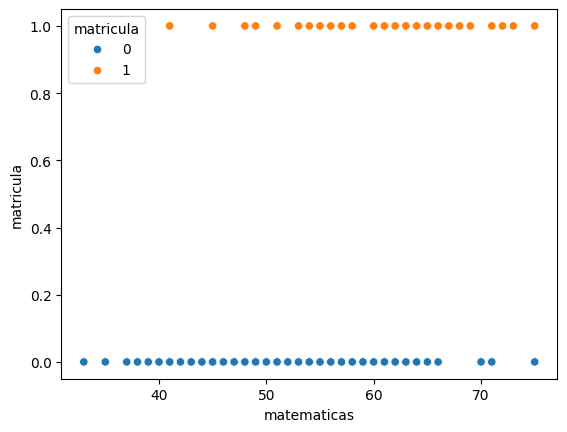

In [7]:
# Haz un scatterplot de los datos
import seaborn as sns
sns.scatterplot(x=datos["matematicas"], y=datos["matricula"], hue=datos["matricula"])

In [8]:
from sklearn.model_selection import train_test_split
# División de los datos en train y test
# ==============================================================================
X = datos[['matematicas']]
y = datos['matricula']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [9]:

import statsmodels.api as sm
# Calcula la regresión lineal
# Crea una nueva regresión lineal (no uses el mismo nombre que la anterior!!!) usando X_train e y_train
# Realiza la regresión lineal

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo

# La convenciones determinan que las features se llamen X 
# Además, tendremos habitualmente un conjunto de train y otro de test (con un split del 80/20, habitualmente)
# Por lo tanto, X_train contiene las features del train
# Este caso es tan sencillo y con pocos datos que no tenemos X_test, pero aparecerá
#X_train =
# Añadimos una columna de 1 porque necesitamos una constante que determine el intercept o B0, el punto donde corta la recta con el eje Y
# Por eso añadimos una columna constante de 0s
# Veremos que estoy aparece en muchos otros modelos (en redes neuronales se llama bias)
X_train = sm.add_constant(X_train, prepend=True)
# OLS: creamos el modelo del tipo Ordinary Least Squares (por alguna razón creo que una vez dije Optimal pero es Ordinary)
modelo = sm.OLS(endog=y_train, exog=X_train)
# Ajustamos el modelo, es decir, hacemos el calculo de la mejor recta posible según los criterios del OLS
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              matricula   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     50.75
Date:                Mon, 20 May 2024   Prob (F-statistic):           3.50e-11
Time:                        18:38:54   Log-Likelihood:                -69.467
No. Observations:                 160   AIC:                             142.9
Df Residuals:                     158   BIC:                             149.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.9440      0.169     -5.574      

In [10]:
# Haz las predicciones. 
# Mira el máximo y mínimo de las predicciones
# Comprueba la diferencia entre tener un 52, 53 o 54 en matemáticas
preds = modelo.predict(X_train)

In [11]:
preds.max()

0.7381502847088521

In [12]:
# Creación del modelo utilizando matrices como en sm
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
#X_train = sm.add_constant(datos[["matematicas"]], prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.422834
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              matricula   No. Observations:                  160
Model:                          Logit   Df Residuals:                      158
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 May 2024   Pseudo R-squ.:                  0.2386
Time:                        18:38:54   Log-Likelihood:                -67.654
converged:                       True   LL-Null:                       -88.858
Covariance Type:            nonrobust   LLR p-value:                 7.403e-11
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.5642      1.647     -5.809      0.000     -12.791      -6.337
matematicas     0.1511    

In [13]:
# Realiza ahora las predicciones 
# Calcula máximo y mínimo
# Comprueba si hay incremento lineal
preds = modelo.predict(X_train)

In [14]:
X_train["preds"] = preds

In [15]:
X_train

,const,matematicas,preds
129,1.0,41,0.033306
128,1.0,56,0.249497
60,1.0,45,0.059320
122,1.0,53,0.174413
27,1.0,57,0.278850
...,...,...,...
151,1.0,61,0.414431
67,1.0,47,0.078608
25,1.0,46,0.068336
196,1.0,38,0.021425


# Predicciones

Una vez generado un modelo válido, es posible predecir la probabilidad de la variable respuesta $y$ para nuevos valores de las variables predictoras $x$. Es importante tener en cuenta que las predicciones deben, a priori, limitarse al rango de valores dentro del que se encuentran las observaciones con las que se ha entrenado el modelo. Esto es importante puesto que, aunque los modelos de regresión logística pueden extrapolarse, solo en esta región se tiene certeza de que se cumplen las condiciones para que el modelo sea válido. Para calcular las predicciones, se emplea la ecuación:

$$\hat{p}(y=1|X) = \frac{e{(\hat{β}_0 + \hat{β}_1x_1 + ⋯ + \hat{β}_px_p)}}{1 + e{(\hat{β}_0+\hat{β}1x_1 + ⋯ + \hat{β}_px_p)}}$$

In [16]:
# Comprueba que las predicciones son correctas
modelo.params
print(math.exp(modelo.params[0]+54*modelo.params[1])/(1+(math.exp(modelo.params[0]+54*modelo.params[1]))))

0.1972540627987212


C:\Users\Jonatan\AppData\Local\Temp\ipykernel_9068\3670012756.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(math.exp(modelo.params[0]+54*modelo.params[1])/(1+(math.exp(modelo.params[0]+54*modelo.params[1]))))


In [17]:
modelo.params

const         -9.564233
matematicas    0.151124
dtype: float64

In [18]:
a = math.exp(modelo.params[0]+54*modelo.params[1])/(1+(math.exp(modelo.params[0]+54*modelo.params[1])))
b = math.exp(modelo.params[0]+55*modelo.params[1])/(1+(math.exp(modelo.params[0]+55*modelo.params[1])))
c = math.exp(modelo.params[0]+56*modelo.params[1])/(1+(math.exp(modelo.params[0]+56*modelo.params[1])))

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_9068\1841485406.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = math.exp(modelo.params[0]+54*modelo.params[1])/(1+(math.exp(modelo.params[0]+54*modelo.params[1])))
C:\Users\Jonatan\AppData\Local\Temp\ipykernel_9068\1841485406.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = math.exp(modelo.params[0]+55*modelo.params[1])/(1+(math.exp(modelo.params[0]+55*modelo.params[1])))
C:\Users\Jonatan\AppData\Local\Temp\ipykernel_9068\1841485406.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alway

In [19]:
c-b

0.02721557665817162

In [20]:
b-a

0.025027117822956718

In [21]:
math.exp(modelo.params[0]+-560*modelo.params[1])/(1+(math.exp(modelo.params[0]+-560*modelo.params[1])))

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_9068\2232175475.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  math.exp(modelo.params[0]+-560*modelo.params[1])/(1+(math.exp(modelo.params[0]+-560*modelo.params[1])))


1.236656045005042e-41

In [22]:
X_train

,const,matematicas,preds
129,1.0,41,0.033306
128,1.0,56,0.249497
60,1.0,45,0.059320
122,1.0,53,0.174413
27,1.0,57,0.278850
...,...,...,...
151,1.0,61,0.414431
67,1.0,47,0.078608
25,1.0,46,0.068336
196,1.0,38,0.021425


# Accuracy

In [23]:
# ¿Cómo calculamos lo bueno que es nuestro modelo?
# Accuracy: % de veces que acertamos
X_test = sm.add_constant(X_test, prepend=True)
preds_test = modelo.predict(X_test)
X_test["prediccion"] = preds_test

In [24]:
X_test["pm"] = X_test["prediccion"]>= 0.5
X_test["pr"] = y_test
X_test["acierto"] = X_test["pm"] == X_test["pr"]
X_test["acierto"].sum()/len(X_test)
X_test["acierto"].mean()

0.875

In [25]:
X_test.loc[X_test["matematicas"]==60, "pm"] = 1

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_9068\2188332793.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_test.loc[X_test["matematicas"]==60, "pm"] = 1


In [26]:
# Comparar con el baseline: siempre valoro el más frecuente: No Matricula
X_test["baseline"] = 0 == X_test["pr"]

In [27]:
X_test["baseline"].mean()

0.75

In [28]:
0.775/0.825

0.9393939393939394

In [29]:
X_train["pm"] = X_train["preds"]>= 0.5
X_train["pr"] = y_train
X_train["acierto"] = X_train["pm"] == X_train["pr"]

In [30]:
X_train["acierto"].mean()

0.7875

In [31]:
X_train["baseline"] = 0 == X_train["pr"]

In [32]:
X_train["baseline"].mean()

0.75625

In [33]:
0.81875/0.7375

1.1101694915254237

In [34]:
datos["matricula"].mean()

0.245

In [35]:
y_train.mean()

0.24375

In [36]:
y_test.mean()

0.25

In [37]:
sum(y_test)

10

# Matriz de Confusión

In [38]:
# Matriz de confusión: Positivos, Falsos positivos, Negativos y Falsos negativos
X_test.groupby(["pm", "pr"])[["pm"]].count()

pm
pm    pr    
False 0   29
      1    5
1     0    1
      1    5

In [39]:
# Repite el ejercicio cuando imponemos que solo con una prob de 0.7 predecimos matricula
X_test["pm"] = X_test["prediccion"]>= 0.7
X_test["pr"] = y_test
X_test["acierto"] = X_test["pm"] == X_test["pr"]
X_test["acierto"].sum()/len(X_test)
X_test["acierto"].mean()
X_test.groupby(["pm", "pr"])[["pm"]].count()

pm
pm    pr    
False 0   30
      1    7
True  1    3

In [40]:
# Repite el ejercicio cuando imponemos que solo con una prob de 0.2 predecimos matricula
X_test["pm"] = X_test["prediccion"]>= 0.2
X_test["pr"] = y_test
X_test["acierto"] = X_test["pm"] == X_test["pr"]
X_test["acierto"].sum()/len(X_test)
X_test["acierto"].mean()
X_test.groupby(["pm", "pr"])[["pm"]].count()

pm
pm    pr    
False 0   23
      1    3
True  0    7
      1    7

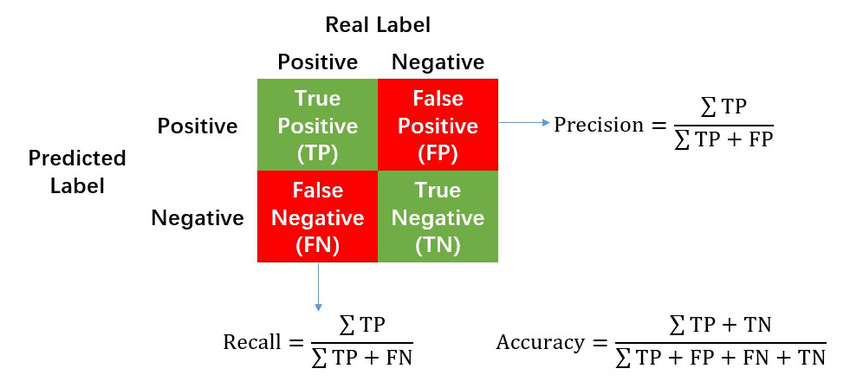

# Sklearn

In [41]:
# Coeficientes de sm
modelo.params

const         -9.564233
matematicas    0.151124
dtype: float64

In [43]:
# Comparar mala distribución aleatoria
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
y_train.mean()

0.2625

In [45]:
y_test.mean()

0.175

In [54]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(datos, datos["matricula"]):
    X_train = datos[["matematicas"]].iloc[train_index]
    X_test = datos[["matematicas"]].iloc[test_index]
    y_train = datos["matricula"].iloc[train_index]
    y_test = datos["matricula"].iloc[test_index]

In [56]:
# Comparar exógena
print(X_train.mean())
print(X_test.mean())

matematicas    52.875
dtype: float64
matematicas    51.725
dtype: float64


In [57]:
# Comprarar endógena
print(y_train.mean())
print(y_test.mean())

0.24375
0.25


In [62]:
from sklearn.linear_model import LogisticRegression
#Ahora con sklearn
# Creación del modelo
# ==============================================================================
# Para no incluir ningún tipo de regularización en el modelo se indica
# penalty=None
modelo = LogisticRegression(penalty=None)
modelo.fit(X = X_train, y =y_train)
LogisticRegression(penalty=None)
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))


Intercept: [-10.01525217]
Coeficiente: [('matematicas', 0.15905497433309304)]


In [63]:
# Predicciones probabilísticas
# ==============================================================================
# Con .predict_proba() se obtiene, para cada observación, la probabilidad predicha
# de pertenecer a cada una de las dos clases.
predicciones = modelo.predict_proba(X = datos[["matematicas"]])
predicciones = pd.DataFrame(predicciones, columns = modelo.classes_)
predicciones.head(3)

,0,1
0,0.970517,0.029483
1,0.829959,0.170041
2,0.806322,0.193678


In [64]:
predicciones["total"] = predicciones[0] + predicciones[1]

In [66]:
sum(predicciones["total"] != 1)

0

In [67]:
# Predicciones 
predicciones_ = modelo.predict(X = datos[["matematicas"]])
predicciones_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [69]:
predicciones["es_mh"] = predicciones[1]>0.5

In [73]:
predicciones["es_mh"][0]

False

In [74]:
predicciones_[0]

0

In [75]:
sum(predicciones["es_mh"]==predicciones_)

200

In [76]:
len(datos)

200

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [78]:
#accuracy_score
accuracy_score(y, predicciones_)

0.81

In [79]:
sum(predicciones_==y)/200

0.81

In [80]:
##confusion_matrix()
confusion_matrix(y, predicciones_)

array([[140,  11],
       [ 27,  22]], dtype=int64)

In [84]:
sum(y)

49

In [83]:
confusion_matrix(y, predicciones_)[0,1]

11

In [82]:
'''Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
'''

'Thus in binary classification, the count of true negatives is\n:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is\n:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.\n'

In [85]:
##recall_score()
recall_score(y, predicciones_)

0.4489795918367347

In [86]:
##precision_score
precision_score(y, predicciones_)

0.6666666666666666

## Significancia del modelo

### Likelihood Ratio

Uno de los primeros resultados que hay que evaluar al ajustar un modelo de regresión logística es el resultado del test de significancia likelihood ratio (LLR). Este contraste responde a la pregunta de si el modelo en su conjunto es capaz de predecir la variable respuesta mejor de lo esperado por azar, o lo que es equivalente, si al menos uno de los predictores que forman el modelo contribuye de forma significativa. Para realizar este análisis se compara la probabilidad de obtener los valores observados (log likelihood) con el modelo de interés ($m_1$) frente a las de un modelo sin predictores (modelo nulo $m_0$).

$LLR=−2log(L(m_0)/L(m_1))=2(logL(m_1)−logL(m_0))$
 
El estadístico LLR tiene una distribución chi-cuadrado con grados de libertad equivalentes a la diferencia de grados de libertad de los dos modelos comparados. Si se compara respecto al modelo nulo, los grados de libertad equivalen al número de predictores.

Con frecuencia, la hipótesis nula y alternativa de este test se describen como:

$H_0:β_1 = ... =  β_p = 0$
 
$H_a: ∃ β_i ≠ 0$
 
Si el test resulta significativo, implica que el modelo es útil, pero no que sea el mejor. Podría ocurrir que alguno de sus predictores no fuese necesario.


### Pseudo R2

A diferencia de los modelos de regresión lineal, en los modelos logísticos no existe un equivalente a  $R2$ que determine exactamente la varianza explicada por el modelo. Se han desarrollado diferentes métodos conocidos como  $pseudoR2$ que intentan aproximarse al concepto de $R2$ pero que, aunque su rango oscila entre 0 y 1, no se pueden considerar equivalentes. El más conocido es el propuesto por McFadden’s:

$R^2_{McF} = 1 − \frac{log\hat{L}(modelo)}{log\hat{L}(modelo nulo)}$
 
siendo  $\hat{L}$ el valor de likelihood de cada modelo.

$R^2_{McF}$ tiene valor 0 si el modelo candidato no mejora al modelo nulo, y valor de 1 si se ajusta perfectamente a los datos.

## Significancia de los predictores

En la mayoría de casos, aunque el estudio de regresión logística se aplica a una muestra, el objetivo último es obtener un modelo que explique la relación entre las variables en toda la población. Esto significa que, el modelo generado, es una estimación de la relación poblacional a partir de la relación que se observa en la muestra y, por lo tanto, está sujeta a variaciones. Para cada uno de los coeficientes de la ecuación de regresión logística ($β_p$) se puede calcular su significancia (p-value) y su intervalo de confianza. El test estadístico más empleado es el Wald chi-test.

El test de significancia para los coeficientes ($β_p$) del modelo logístico considera como hipótesis:

$H_0$: el predictor $x_p$ no contribuye al modelo ($β_p = 0$), en presencia del resto de predictores.

$H_a$: el predictor $x_p$ sí contribuye al modelo ($β_p ≠ 0$), en presencia del resto de predictores.

En los modelos generados con statsmodels se devuelve, junto con el valor de los coeficientes de regresión, el valor del estadístico $z$ obtenido para cada uno, los p-value y los intervalos de confianza correspondientes. Esto permite saber, además de las estimaciones, si son significativamente distintos de 0, es decir, si contribuyen al modelo.

## Variables categóricas como predictores

Cuando se introduce una variable categórica como predictor, un nivel se considera el de referencia (normalmente codificado como 0) y el resto de niveles se comparan con él. En el caso de que el predictor categórico tenga más de dos niveles, se generan lo que se conoce como variables dummy o one-hot-encodding, que son variables creadas para cada uno de los niveles del predictor categórico y que pueden tomar el valor de 0 o 1. Cada vez que se emplee el modelo para predecir un valor, solo una variable dummy por predictor adquiere el valor 1 (la que coincida con el valor que adquiere el predictor en ese caso) mientras que el resto se consideran 0. El valor del coeficiente parcial de regresión  $β_p$ de cada variable dummy indica el porcentaje promedio en el que influye dicho nivel sobre el logaritmo de odds de la variable dependiente $y$ en comparación con el nivel de referencia de dicho predictor.

La idea de variables dummy se entiende mejor con un ejemplo. Supóngase un modelo en el que la variable respuesta ojos verdes (si/no) se predice en función de nacionalidad del sujeto. La variable nacionalidad es cualitativa con 3 niveles (americana, europea y asiática). A pesar de que el predictor inicial es nacionalidad, se crea una variable nueva por cada nivel, cuyo valor puede ser 0 o 1. De tal forma que la ecuación del modelo completo es:

$$p(ojos verdes = si) = \frac{e^{(β_0 + β_1americana + β_2europea + β_3asiatica)}}{1 + e^{(β_0 + β_1americana + β_2europea+ β_3asiatica)}}$$
 
Si el sujeto es europeo, las variables dummy americana y asiática se consideran 0, de forma que el modelo para este caso se queda en:

$$p(ojos verdes = si)=\frac{e^{(β0+β2europea)}}{1+e^{(β0+β2europea)}}$$
 

## Predicción

Una vez generado un modelo válido, es posible predecir la probabilidad de la variable respuesta $y$ para nuevos valores de las variables predictoras $x$. Es importante tener en cuenta que las predicciones deben, a priori, limitarse al rango de valores dentro del que se encuentran las observaciones con las que se ha entrenado el modelo. Esto es importante puesto que, aunque los modelos de regresión logística pueden extrapolarse, solo en esta región se tiene certeza de que se cumplen las condiciones para que el modelo sea válido. Para calcular las predicciones, se emplea la ecuación:

$$\hat{p}(y=1|X) = \frac{e{(\hat{β}_0 + \hat{β}_1x_1 + ⋯ + \hat{β}_px_p)}}{1 + e{(\hat{β}_0+\hat{β}1x_1 + ⋯ + \hat{β}_px_p)}}$$

## Convertir probabilidad en clasificación

Una de las principales aplicaciones de un modelo de regresión logística es clasificar la variable cualitativa en función del valor que tomen los predictores. Dado que la salida de un modelo logístico es una probabilidad, para conseguir la clasificación, es necesario establecer un límite (threshold) a partir del cual se considera que la variable pertenece a uno de los niveles. Por ejemplo, se puede asignar una observación al grupo 1 si la probabilidad estimada es mayor de 0.5 y al grupo 0 de lo contrario.

## Validación del modelo

Una vez seleccionado el mejor modelo que se puede crear con los datos disponibles, se tiene que comprobar su capacidad prediciendo nuevas observaciones que no se hayan empleado para entrenarlo, de este modo se verifica si el modelo se puede generalizar. Una estrategia comúnmente empleada es dividir aleatoriamente los datos en dos grupos, ajustar el modelo con el primer grupo y estimar la precisión de las predicciones con el segundo.

El tamaño adecuado de las particiones depende en gran medida de la cantidad de datos disponibles y la seguridad que se necesite en la estimación del error, 80% 20% suele dar buenos resultados.

## Condiciones para la regresión logística

Para que un modelo de regresión logística, y las conclusiones derivadas de él, sean completamente válidas, se deben verificar que se cumplen las asunciones sobre las que se basa su desarrollo matemático. En la práctica, rara vez se cumplen, o se puede demostrar que se cumplen todas, sin embargo esto no significa que el modelo no sea útil. Lo importante es ser consciente de ellas y del impacto que esto tiene en las conclusiones que se extraen del modelo.


**No colinealidad o multicolinealidad:**

En los modelos de regresión logística múltiple, los predictores deben ser independientes, no debe de haber colinealidad entre ellos. La colinealidad ocurre cuando un predictor está linealmente relacionado con uno o varios de los otros predictores del modelo. Como consecuencia de la colinealidad, no se puede identificar de forma precisa el efecto individual que tiene cada predictor sobre la variable respuesta, lo que se traduce en un incremento de la varianza de los coeficientes de regresión estimados hasta el punto de que resulta imposible establecer su significancia estadística. Además, pequeños cambios en los datos, provocan grandes cambios en las estimaciones de los coeficientes. Si bien la colinealidad propiamente dicha existe solo si el coeficiente de correlación simple o múltiple entre predictores es 1, cosa que raramente ocurre en la realidad, es frecuente encontrar la llamada casi-colinealidad o multicolinealidad no perfecta.

En caso de encontrar colinealidad entre predictores, hay dos posibles soluciones. La primera es excluir uno de los predictores problemáticos intentando conservar el que, a juicio del investigador, está influyendo realmente en la variable respuesta. Esta medida no suele tener mucho impacto en el modelo en cuanto a su capacidad predictiva ya que, al existir colinealidad, la información que aporta uno de los predictores es redundante en presencia del otro. La segunda opción consiste en combinar las variables colineales en un único predictor, aunque con el riesgo de perder su interpretación.

Cuando se intenta establecer relaciones causa-efecto, la colinealidad puede llevar a conclusiones muy erróneas, haciendo creer que una variable es la causa cuando, en realidad, es otra la que está influenciando sobre ese predictor.


**Relación lineal entre los predictores numéricos y el logaritmo de odds de la variable respuesta**

Cada predictor numérico tiene que estar linealmente relacionado con el logaritmo de odds de la variable respuesta  y
  mientras los demás predictores se mantienen constantes, de lo contrario no se deben introducir en el modelo.


**No autocorrelación (Independencia)**

Los valores de cada observación son independientes de los otros. Esto es especialmente importante de comprobar cuando se trabaja con mediciones temporales. Se recomienda representar los residuos ordenados acorde al tiempo de registro de las observaciones, si existe un cierto patrón hay indicios de autocorrelación. También se puede emplear el test de hipótesis de Durbin-Watson.


**Valores atípicos, con alto leverage o influyentes**

Es importante identificar observaciones que sean atípicas o que puedan estar influenciando al modelo. La forma más fácil de detectarlas es a través de los residuos.


**Tamaño de la muestra**

No se trata de una condición de por sí pero, si no se dispone de suficientes observaciones, predictores que no son realmente influyentes podrían parecerlo. Un recomendación frecuente es que el número de observaciones sea como mínimo entre 10 y 20 veces el número de predictores del modelo.


**Parsimonia**

Este término hace referencia a que, el mejor modelo, es aquel capaz de explicar con mayor precisión la variabilidad observada en la variable respuesta empleando el menor número de predictores, por lo tanto, con menos asunciones.


La gran mayoría de condiciones se verifican utilizando los residuos, por lo tanto, se suele generar primero el modelo y posteriormente validar las condiciones. De hecho, el ajuste de un modelo debe verse como un proceso iterativo en el que se ajusta el modelo, se evalúan sus residuos y se mejora. Así hasta llegar a un modelo óptimo.


--------------------

## Ejemplo regresión logística múltiple


El set de datos spam, obtenido de UCI Repository Of Machine Learning Databases contiene información sobre 4601 correos electrónicos clasificados como spam y no spam.

Para cada correo electrónico se dispone de 58 variables: las 48 primeras contienen la frecuencia con la que aparecen en el texto del email determinadas palabras. Las variables 49-54 indican la frecuencia con la que aparecen los caracteres ;’, ‘(’, ‘[’, ‘!’, ‘$’, ‘#’. Las variables 55-57 contienen la media, a longitud máxima y el número total de letras mayúsculas.

Se crear un modelo de regresión logística con el objetivo de clasificar si un correo es spam o no.

### Librerías

In [87]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [88]:
# Datos
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
       + 'Estadistica-machine-learning-python/master/data/spam.csv'
datos = pd.read_csv(url)

In [89]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               4601 non-null   float64
 1   address            4601 non-null   float64
 2   all                4601 non-null   float64
 3   num3d              4601 non-null   float64
 4   our                4601 non-null   float64
 5   over               4601 non-null   float64
 6   remove             4601 non-null   float64
 7   internet           4601 non-null   float64
 8   order              4601 non-null   float64
 9   mail               4601 non-null   float64
 10  receive            4601 non-null   float64
 11  will               4601 non-null   float64
 12  people             4601 non-null   float64
 13  report             4601 non-null   float64
 14  addresses          4601 non-null   float64
 15  free               4601 non-null   float64
 16  business           4601 

In [90]:
datos.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


Se codifica la variable respuesta como 1 si es spam y 0 si no lo es, y se identifica cuantas observaciones hay de cada clase.

In [91]:
datos['type'] = np.where(datos['type'] == 'spam', 1, 0)

print("Número de observaciones por clase")
print(datos['type'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * datos['type'].value_counts(normalize=True))

Número de observaciones por clase
type
0    2788
1    1813
Name: count, dtype: int64

Porcentaje de observaciones por clase
type
0    60.595523
1    39.404477
Name: proportion, dtype: float64


El 60.6% de los correos no son spam y el 39.4% sí lo son. Un modelo de clasificación que sea útil debe de ser capaz de predecir correctamente un porcentaje de observaciones por encima del porcentaje de la clase mayoritaria.

 En este caso, el umbral de referencia que se tiene que superar es del 60.6%.

### Ajuste del modelo


Se ajusta un modelo de regresión logística múltiple con el objetivo de predecir si un correo es spam en función de todas las variables disponibles.

In [92]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'type')
y = datos['type']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234
                                    )

In [93]:
y_train.mean()

0.3953804347826087

In [95]:
y_train.mean()/y_test.mean()

1.0171658671362642

In [96]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
# https://www.kaggle.com/datasets/somesh24/spambase
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.200751
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                   type   No. Observations:                 3680
Model:                          Logit   Df Residuals:                     3622
Method:                           MLE   Df Model:                           57
Date:                Mon, 20 May 2024   Pseudo R-squ.:                  0.7009
Time:                        19:29:12   Log-Likelihood:                -738.76
converged:                       True   LL-Null:                       -2469.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5530      0.156     -9.956      0.000      -1.859      -1.247
make   

### Predicciones

Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular los intervalos de confianza asociados a cada predicción.

In [97]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.predict(exog = X_train)

# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

array([0, 0, 0, ..., 1, 1, 0])

### Accuracy de test

Se calcula el porcentaje de aciertos que tiene el modelo al predecir las observaciones de test (accuracy).

In [98]:
# Accuracy de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 92.83387622149837%


In [99]:
# Realizar con sklearn: ver matriz confusion, recall, precision...
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234
                                    )

In [100]:
modelo = LogisticRegression(penalty=None)
modelo.fit(X = X_train, y =y_train)
LogisticRegression(penalty=None)
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))


Intercept: [-1.1503459]
Coeficiente: [('make', -0.07843724567291957), ('address', -0.14744058052118955), ('all', 0.10580964094165206), ('num3d', 0.27085065056494373), ('our', 1.01422793837799), ('over', 0.4653677999949007), ('remove', 1.1951642807804437), ('internet', 0.8104220015072026), ('order', 0.2691222683377993), ('mail', 0.2021099268213437), ('receive', 0.12519853394233466), ('will', -0.004004313154007261), ('people', 0.11652543249355782), ('report', 0.06448755631615581), ('addresses', 0.2647962028583665), ('free', 1.2306133431308899), ('business', 0.784319223804176), ('email', 0.34798662442746925), ('you', -0.0674982069424017), ('credit', 0.5387599499043398), ('your', 0.21530663248265622), ('font', 0.19657137400288424), ('num000', 1.058598323584073), ('money', 0.5609430011851094), ('hp', -2.681847414741857), ('hpl', -1.3173651316850108), ('george', -3.552267040537548), ('num650', -0.17443556418708478), ('lab', -0.6121896155171894), ('labs', -0.45316551064215854), ('telnet', -0.

In [101]:
pred_test = modelo.predict(X_test)
confusion_matrix(pred_test, y_test)

array([[527,  36],
       [ 36, 322]], dtype=int64)

In [105]:
accuracy_score(y_test, pred_test)

0.9218241042345277

In [106]:
recall_score(y_test, pred_test)

0.8994413407821229

In [107]:
precision_score(y_test, pred_test)

0.8994413407821229

In [122]:
pred_total = np.where(predicciones<0.95, 0, 1)

In [123]:
confusion_matrix(y_test, pred_total)

array([[555,   8],
       [156, 202]], dtype=int64)

In [124]:
recall_score(y_test, pred_total)

0.5642458100558659

In [125]:
precision_score(y_test, pred_total)

0.9619047619047619

In [127]:
f1_score(y_test, pred_total)

0.7112676056338029

### Conclusión

El modelo logístico creado para predecir la probabilidad de que un correo sea spam es en conjunto significativo (Likelihood ratio p-value = 0). El porcentaje de clasificación correcta en el conjunto del test es del 92.8%, un valor muy por encima del umbral de 66.6% esperado por azar.

Acorde al p-value individual de cada predictor, solo algunos de ellos aportan información al modelo. Es conveniente identificar cuáles son y excluirlos para simplificar el modelo y evitar la introducción de ruido. Una forma de conseguir reducir la influencia de predictores que no aportan a un modelo de regresión logística es incorporar regularización en su ajuste.